In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

##### Load cifar10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##### Data pre-processing
Normalize RGB value (0~255) to (0~1)

In [4]:
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


##### Convolution Neural Network With Dropout, Batch Normalization

In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3,
           strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3,
           strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,
           strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,
           strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0     

##### Compile Model

In [7]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

##### Training Model

In [8]:
model.fit(x_train, y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True,
          verbose = 2)

Train on 50000 samples
Epoch 1/10
50000/50000 - 139s - loss: 1.5477 - accuracy: 0.4593
Epoch 2/10
50000/50000 - 144s - loss: 1.1420 - accuracy: 0.5961
Epoch 3/10
50000/50000 - 142s - loss: 1.0021 - accuracy: 0.6486
Epoch 4/10
50000/50000 - 143s - loss: 0.9129 - accuracy: 0.6825
Epoch 5/10
50000/50000 - 142s - loss: 0.8514 - accuracy: 0.7042
Epoch 6/10
50000/50000 - 142s - loss: 0.8011 - accuracy: 0.7210
Epoch 7/10
50000/50000 - 144s - loss: 0.7546 - accuracy: 0.7370
Epoch 8/10
50000/50000 - 143s - loss: 0.7168 - accuracy: 0.7509
Epoch 9/10
50000/50000 - 143s - loss: 0.6784 - accuracy: 0.7646
Epoch 10/10
50000/50000 - 145s - loss: 0.6493 - accuracy: 0.7730


##### Evaluate Model

In [9]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8549752178192138, 0.7063]

##### Accuracy Per Category

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                    'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

##### Make Plot

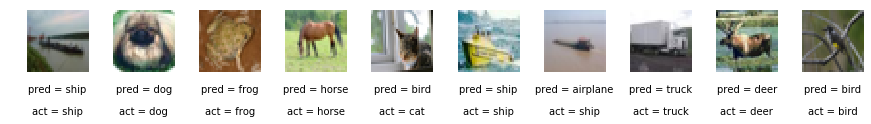

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),
           fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)